## Module 3 Final Project Submission

Please fill out:
* Student name: Rachel Beery
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Rafael
* Blog post URL:


__Background:__ In Terry v. Ohio, a landmark Supreme Court case in 1967-8, the court found that a police officer was not in violation of the "unreasonable search and seizure" clause of the Fourth Amendment, even though he stopped and frisked a couple of suspects only because their behavior was suspicious.

Thus was born the notion of "reasonable suspicion", according to which an agent of the police may e.g. temporarily detain a person, even in the absence of clearer evidence that would be required for full-blown arrests etc. Terry Stops are stops made of suspicious drivers.

__Objective:__ I will be building a classifier to predict whether an arrest was made after a Terry Stop. 

__Aprroach:__ The OSEUMiN data science workflow is utilized to effectively build a classifier to predict whether an arrest was made after a Terry Stop, given information about the presence of weapons, the time of day of the call, etc. Note that this is a binary classification problem. We will also be analyzing whether race (of officer or of subject) plays a role in whether or not an arrest is made.

__Data:__ In my project I will be utilizing the Terry Traffic Stops dataset that was provided by Flatiron School. The data set can be downloaded from the following website: https://catalog.data.gov/dataset/terry-stops

# Data Frame Column Descriptions

- __Subject Age Group:__ Subject Age Group (10 year increments) as reported by the officer. 

- __Subject ID:__ Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification. 

- __GO / SC Num:__ General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data. 

- __Terry Stop ID:__ Key identifying unique Terry Stop reports. 

- __Stop Resolution:__ Resolution of the stop as reported by the officer. 

- __Weapon Type:__ Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found. 

- __Officer ID:__ Key identifying unique officers in the dataset. 

- __Officer YOB:__ Year of birth, as reported by the officer. 

- __Officer Gender:__ Gender of the officer, as reported by the officer. 

- __Officer Race:__ Race of the officer, as reported by the officer. 

- __Subject Perceived Race:__ Perceived race of the subject, as reported by the officer. 

- __Subject Perceived Gender:__ Perceived gender of the subject, as reported by the officer. 

- __Reported Date:__ Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day. 

- __Reported Time:__ Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours. 

- __Initial Call Type:__ Initial classification of the call as assigned by 911. 

- __Final Call Type:__ Final classification of the call as assigned by the primary officer closing the event. 

- __Call Type:__ How the call was received by the communication center. 

- __Officer Squad:__ Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP). 

- __Arrest Flag:__ Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS). 

- __Frisk Flag:__ Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop. 

- __Precinct:__ Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred. 

- __Sector:__ Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred. 

- __Beat:__ Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

# Current questions I have?
1. What officer demographics influence policing including arrests?
- Does gender have an influence on certain arrests/stops?
- Using a machine learning model can we find what feature has the most influence on an arrest?

In [1]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import plotly.express as px
import math
import scipy.stats as stats
from scipy import stats
import missingno as ms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Everything sklearn!
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, make_scorer, roc_auc_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
df = pd.read_csv(r"Terry_Stops.csv")
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-


In [4]:
# How big is this dataset?
df.shape

(44838, 23)

In [5]:
# Looking at our columns and seeing what data types they are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 23 columns):
Subject Age Group           44838 non-null object
Subject ID                  44838 non-null int64
GO / SC Num                 44838 non-null int64
Terry Stop ID               44838 non-null int64
Stop Resolution             44838 non-null object
Weapon Type                 44838 non-null object
Officer ID                  44838 non-null object
Officer YOB                 44838 non-null int64
Officer Gender              44838 non-null object
Officer Race                44838 non-null object
Subject Perceived Race      44838 non-null object
Subject Perceived Gender    44838 non-null object
Reported Date               44838 non-null object
Reported Time               44838 non-null object
Initial Call Type           44838 non-null object
Final Call Type             44838 non-null object
Call Type                   44838 non-null object
Officer Squad               44258 non-null ob

In [6]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,44838.000,44838.000,44838.000,44838.000
mean,2048175291.344,20174348941910.688,2744795110.441,1982.669
std,3929607679.159,16285901271.067,5137079881.459,9.293
min,-1.000,20090000228667.000,28020.000,1900.000
25%,-1.000,20160000114011.500,173327.250,1978.000
50%,-1.000,20180000000168.500,386616.000,1985.000
75%,-1.000,20190000106221.000,550190.000,1989.000
max,17551785130.000,20200000314486.000,17551783994.000,1997.000


In [7]:
# Let's find those missing values
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               580
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [8]:
# Are there Duplicate Rows??
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()
# Looks like we don't have any or they are hiding

0


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat


(4, -0.5)

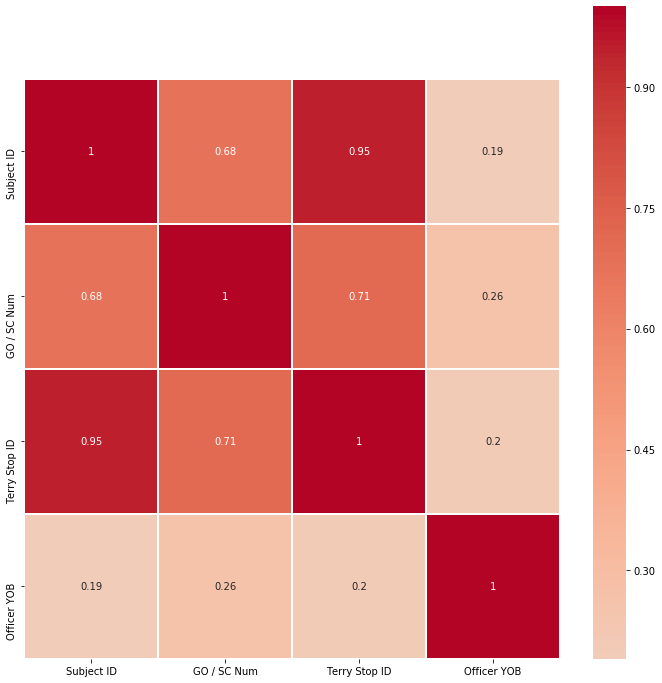

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr().abs(), center=0, annot=True, linewidths=1.5, cmap='coolwarm');
ax.set_ylim(len(df.corr())-0, -0.5)

# Scrub

In [10]:
df['Subject ID'].value_counts()
# May not end up dropping
# Not sure that exactly these IDs are for

-1              34700
 7726859935        19
 7753260438        13
 7727117712        12
 7727600619         9
                ...  
 15879606630        1
 7758922092         1
 7727677812         1
 9640739188         1
 16219707395        1
Name: Subject ID, Length: 7945, dtype: int64

In [11]:
df['GO / SC Num'].value_counts()
# Also not sure exactly what this is but I don't find it important to have

20160000378750    16
20150000190790    16
20180000134604    14
20190000441736    13
20170000132836    13
                  ..
20190000045451     1
20170000158799     1
20150000003136     1
20180000479302     1
20180000071981     1
Name: GO / SC Num, Length: 35023, dtype: int64

In [12]:
# Also a column not needed but we will look at it to make sure
df['Terry Stop ID'].value_counts()

13080077761    3
15045077325    3
14935106231    2
12781960580    2
12851512661    2
              ..
477105         1
516777         1
86813          1
557733         1
131072         1
Name: Terry Stop ID, Length: 44814, dtype: int64

In [13]:
df['Officer ID'].value_counts()
# This column is what I may look at later but for now I will drop it

7456      401
7634      339
7773      307
7765      304
7758      299
         ... 
6058        1
5689        1
6363        1
5699        1
5729        1
Name: Officer ID, Length: 1178, dtype: int64

In [14]:
# I'm going to go ahead and start by dropping the columns we will not be using
df = df.drop(columns=['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Officer ID'], axis=1)

In [15]:
df.head(5)

,Subject Age Group,Stop Resolution,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,Arrest,None,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,Field Contact,None,1965,M,White,-,-,2015-03-19T00:00:00,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,Field Contact,None,1961,M,White,White,Male,2015-03-21T00:00:00,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,Field Contact,None,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,Field Contact,None,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,-,-,-,NaN,N,N,-,-,-


In [16]:
df['Subject Age Group'].value_counts()

26 - 35         14905
36 - 45          9460
18 - 25          9069
46 - 55          5768
56 and Above     2283
1 - 17           1935
-                1418
Name: Subject Age Group, dtype: int64

In [17]:
df['Subject Age Group'].mode()

0    26 - 35
dtype: object

In [18]:
df['Subject Age Group'] = df['Subject Age Group'].replace('-', '26 - 35')
df['Subject Age Group'].value_counts()

26 - 35         16323
36 - 45          9460
18 - 25          9069
46 - 55          5768
56 and Above     2283
1 - 17           1935
Name: Subject Age Group, dtype: int64

In [19]:
df['Stop Resolution'].value_counts()

Field Contact               17968
Offense Report              15124
Arrest                      10843
Referred for Prosecution      728
Citation / Infraction         175
Name: Stop Resolution, dtype: int64

In [20]:
# As we already have a field for whether an arrest was made or not 
# I will drop the 'Stop Resolution' column
df = df.drop(columns=['Stop Resolution'], axis=1)

In [21]:
df['Weapon Type'].value_counts()

None                                 32565
-                                     9671
Lethal Cutting Instrument             1482
Knife/Cutting/Stabbing Instrument      496
Handgun                                281
Firearm Other                          100
Blunt Object/Striking Implement         66
Club, Blackjack, Brass Knuckles         49
Firearm                                 34
Mace/Pepper Spray                       20
Other Firearm                           18
Firearm (unk type)                      15
Club                                     9
Rifle                                    7
None/Not Applicable                      7
Taser/Stun Gun                           7
Fire/Incendiary Device                   4
Shotgun                                  3
Automatic Handgun                        2
Brass Knuckles                           1
Blackjack                                1
Name: Weapon Type, dtype: int64

In [22]:
# Cleaning the nulls and missing values
df['Weapon Type'] = df['Weapon Type'].replace('-', 'None')
df['Weapon Type'] = df['Weapon Type'].replace('None/Not Applicable', 'None')

In [23]:
# Checking to make sure it worked
df['Weapon Type'].value_counts()

None                                 42243
Lethal Cutting Instrument             1482
Knife/Cutting/Stabbing Instrument      496
Handgun                                281
Firearm Other                          100
Blunt Object/Striking Implement         66
Club, Blackjack, Brass Knuckles         49
Firearm                                 34
Mace/Pepper Spray                       20
Other Firearm                           18
Firearm (unk type)                      15
Club                                     9
Taser/Stun Gun                           7
Rifle                                    7
Fire/Incendiary Device                   4
Shotgun                                  3
Automatic Handgun                        2
Blackjack                                1
Brass Knuckles                           1
Name: Weapon Type, dtype: int64

In [24]:
#Bin weapon type columns to lethal cutting instrument, firearm, other
df['Weapon Type'].replace('Knife/Cutting/Stabbing Instrument', 'Lethal Cutting Instrument', inplace=True)

df['Weapon Type'].replace('Handgun', 'Firearm', inplace=True)
df['Weapon Type'].replace('Other Firearm', 'Firearm', inplace=True)
df['Weapon Type'].replace('Rifle', 'Firearm', inplace=True)
df['Weapon Type'].replace('Firearm (unk type)', 'Firearm', inplace=True)
df['Weapon Type'].replace('Shotgun', 'Firearm', inplace=True)
df['Weapon Type'].replace('Automatic Handgun', 'Firearm', inplace=True)
df['Weapon Type'].replace('Taser/Stun Gun', 'Firearm', inplace=True)
df['Weapon Type'].replace('Fire/Incendiary Device', 'Firearm', inplace=True)
df['Weapon Type'].replace('Firearm Other', 'Firearm', inplace=True)

df['Weapon Type'].replace('Club, Blackjack, Brass Knuckles', 'Other', inplace=True)
df['Weapon Type'].replace('Club', 'Other', inplace=True)
df['Weapon Type'].replace('Blackjack', 'Other', inplace=True)
df['Weapon Type'].replace('Fire/Incendiary Device', 'Other', inplace=True)
df['Weapon Type'].replace('Blunt Object/Striking Implement', 'Other', inplace=True)
df['Weapon Type'].replace('Mace/Pepper Spray', 'Other', inplace=True)
df['Weapon Type'].replace('Brass Knuckles', 'Other', inplace=True)

In [25]:
df['Weapon Type'].value_counts()

None                         42243
Lethal Cutting Instrument     1978
Firearm                        471
Other                          146
Name: Weapon Type, dtype: int64

In [26]:
# Need to come back and make weapons binary (had a weapon or no weapon)

In [27]:
df['Officer YOB'].value_counts()

1986    3153
1987    2880
1984    2670
1991    2590
1985    2424
1992    2258
1990    2128
1988    1975
1989    1915
1982    1811
1983    1661
1979    1443
1981    1366
1993    1323
1971    1211
1978    1117
1995     980
1976     979
1977     977
1973     896
1994     803
1980     785
1967     705
1968     622
1970     576
1974     546
1969     530
1975     519
1996     493
1962     452
1972     414
1965     414
1964     411
1997     327
1963     255
1966     223
1958     218
1961     208
1959     174
1960     161
1900      60
1954      44
1957      43
1953      32
1955      21
1956      17
1948      11
1952       9
1949       5
1946       2
1951       1
Name: Officer YOB, dtype: int64

In [28]:
df['Officer Gender'].value_counts()

M    39709
F     5100
N       29
Name: Officer Gender, dtype: int64

In [29]:
# Removing Officer Gender 'N'
df = df[df['Officer Gender'] != 'N']

In [30]:
# Making Officer Gender Binary
df['Officer Gender'].replace('M', 1.0, inplace=True)
df['Officer Gender'].replace('F', 0.0, inplace=True)

In [31]:
# Making sure it worked
df['Officer Gender'].value_counts()

1.000    39709
0.000     5100
Name: Officer Gender, dtype: int64

In [32]:
df['Officer Race'].value_counts()

White                            34109
Hispanic or Latino                2547
Two or More Races                 2487
Asian                             1850
Black or African American         1793
Not Specified                     1244
Nat Hawaiian/Oth Pac Islander      437
American Indian/Alaska Native      311
Unknown                             31
Name: Officer Race, dtype: int64

In [33]:
df['Officer Race'] = df['Officer Race'].replace('Unknown', 'Not Specified')
df['Officer Race'].value_counts()

White                            34109
Hispanic or Latino                2547
Two or More Races                 2487
Asian                             1850
Black or African American         1793
Not Specified                     1275
Nat Hawaiian/Oth Pac Islander      437
American Indian/Alaska Native      311
Name: Officer Race, dtype: int64

In [34]:
# Making officer race binary with White and non-white as this of interest
#df['Officer Race'].replace('White', 1.0, inplace=True)
#values = df['Officer Race'].values
#df['Officer Race'] = np.where(values != 1.0, 0.0, 1.0)

In [35]:
df['Subject Perceived Race'].value_counts()

White                                        21902
Black or African American                    13356
Unknown                                       2380
-                                             1754
Hispanic                                      1684
Asian                                         1429
American Indian or Alaska Native              1301
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       42
Name: Subject Perceived Race, dtype: int64

In [36]:
df['Subject Perceived Race'] = df['Subject Perceived Race'].replace('Other', 'Unknown')
df['Subject Perceived Race'] = df['Subject Perceived Race'].replace('-', 'Unknown')
df['Subject Perceived Race'].value_counts()

White                                        21902
Black or African American                    13356
Unknown                                       4286
Hispanic                                      1684
Asian                                         1429
American Indian or Alaska Native              1301
Multi-Racial                                   809
Native Hawaiian or Other Pacific Islander       42
Name: Subject Perceived Race, dtype: int64

In [37]:
# Making the subjext race binary as well to see if there are patterns in the data
#df['Subject Perceived Race'].replace('White', 1.0, inplace=True)
#df['Subject Perceived Race'].replace('Black or African American', 1.0, inplace=True)
#values = df['Subject Perceived Race'].values
#df['Subject Perceived Race'] = np.where(values != 1.0, 0.0, 1.0)

In [38]:
df['Subject Perceived Gender'].value_counts()

Male                                                         35039
Female                                                        9157
Unable to Determine                                            326
-                                                              263
Unknown                                                         20
Gender Diverse (gender non-conforming and/or transgender)        4
Name: Subject Perceived Gender, dtype: int64

In [39]:
df = df[(df['Subject Perceived Gender'] == 'Male') | (df['Subject Perceived Gender'] == 'Female')]

In [40]:
df['Subject Perceived Gender'].value_counts()

Male      35039
Female     9157
Name: Subject Perceived Gender, dtype: int64

In [41]:
# Making Officer Gender Binary
df['Subject Perceived Gender'].replace('Male', 1.0, inplace=True)
df['Subject Perceived Gender'].replace('Female', 0.0, inplace=True)

In [42]:
df['Subject Perceived Gender'].value_counts()

1.000    35039
0.000     9157
Name: Subject Perceived Gender, dtype: int64

In [43]:
df['Reported Date'].value_counts()

2015-10-01T00:00:00    91
2015-09-29T00:00:00    66
2015-05-28T00:00:00    57
2019-04-26T00:00:00    53
2015-08-04T00:00:00    53
                       ..
2015-05-10T00:00:00     1
2015-04-28T00:00:00     1
2015-03-28T00:00:00     1
2015-05-06T00:00:00     1
2015-04-14T00:00:00     1
Name: Reported Date, Length: 2064, dtype: int64

In [44]:
df['Reported Date'] = df['Reported Date'].str.split('T').str[0]

In [45]:
df['Reported Date'].value_counts()

2015-10-01    91
2015-09-29    66
2015-05-28    57
2015-08-04    53
2019-04-26    53
              ..
2015-03-28     1
2015-04-28     1
2015-05-06     1
2015-03-24     1
2015-03-31     1
Name: Reported Date, Length: 2064, dtype: int64

In [46]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

In [47]:
df['Reported Day of Week'] = df['Reported Date'].dt.day_name()

In [48]:
df['Reported Year'] = df['Reported Date'].dt.year
df['Reported Month'] = df['Reported Date'].dt.month
df['Reported Day'] = df['Reported Date'].dt.day

In [49]:
df = df.drop(columns=['Reported Date'], axis=1)

In [50]:
#Convert to datetime
df['Reported Time'] = df['Reported Time'].str.split(':')
df['Reported Time'].head()

0    [11, 32, 00]
2    [19, 12, 00]
4    [00, 41, 00]
5    [23, 46, 00]
6    [21, 39, 00]
Name: Reported Time, dtype: object

In [51]:
df['Reported Hour'] = df['Reported Time'].map(lambda x: x[0]).astype('float64')
df['Reported Minute'] = df['Reported Time'].map(lambda x: x[1]).astype('float64')

In [52]:
df = df.drop(columns=['Reported Time'], axis=1)

In [53]:
df.head(5)

,Subject Age Group,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Reported Day of Week,Reported Year,Reported Month,Reported Day,Reported Hour,Reported Minute
0,26 - 35,None,1984,1.000,Black or African American,Asian,1.000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,Friday,2015,10,16,11.000,32.000
2,26 - 35,None,1961,1.000,White,White,1.000,-,-,-,NaN,N,-,-,-,-,Saturday,2015,3,21,19.000,12.000
4,26 - 35,None,1977,1.000,White,Black or African American,1.000,-,-,-,NaN,N,N,-,-,-,Friday,2015,4,3,0.000,41.000
5,26 - 35,None,1973,1.000,White,Black or African American,1.000,-,-,-,NaN,N,N,-,-,-,Sunday,2015,4,5,23.000,46.000
6,26 - 35,None,1985,1.000,Hispanic or Latino,Unknown,0.000,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-,Wednesday,2015,5,20,21.000,39.000


In [54]:
df = df.drop(columns = ['Reported Minute', 'Reported Hour', 'Reported Day'])

In [55]:
df.head(5)

,Subject Age Group,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Reported Day of Week,Reported Year,Reported Month
0,26 - 35,None,1984,1.000,Black or African American,Asian,1.000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2,Friday,2015,10
2,26 - 35,None,1961,1.000,White,White,1.000,-,-,-,NaN,N,-,-,-,-,Saturday,2015,3
4,26 - 35,None,1977,1.000,White,Black or African American,1.000,-,-,-,NaN,N,N,-,-,-,Friday,2015,4
5,26 - 35,None,1973,1.000,White,Black or African American,1.000,-,-,-,NaN,N,N,-,-,-,Sunday,2015,4
6,26 - 35,None,1985,1.000,Hispanic or Latino,Unknown,0.000,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-,Wednesday,2015,5


In [56]:
df['Initial Call Type'].value_counts()
# There are a lot of null values
# As there are many nulls that can't be accounted for I may drop the column and instead use call type

-                                                 12776
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW         2889
SUSPICIOUS PERSON, VEHICLE OR INCIDENT             2770
DISTURBANCE, MISCELLANEOUS/OTHER                   2276
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)     1875
                                                  ...  
PROPERTY - FOUND GUN, SHELLCASINGS                    1
PHONE - OBSCENE OR NUISANCE PHONE CALLS               1
ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS         1
-ASSIGNED DUTY - STAKEOUT                             1
PROPERTY - DAMAGE (GUN RELATED)                       1
Name: Initial Call Type, Length: 165, dtype: int64

In [57]:
df['Initial Call Type'].nunique()

165

In [58]:
df['Final Call Type'].value_counts()
# Final Call type also has many nulls values so I may end up dropping
# It should be noted that the same amount of nulls are found for initial call type and final call type
# There may be a bad practice of data reporting

-                                           12776
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON     3447
--PROWLER - TRESPASS                         3096
--DISTURBANCE - OTHER                        2511
--ASSAULTS, OTHER                            2157
                                            ...  
DOWN - CHECK FOR DOWN PERSON                    1
FIGHT - VERBAL/ORAL (NO WEAPONS)                1
ORDER - VIOLATING DV COURT ORDER                1
NARCOTICS WARRANT SERVICE                       1
OVERDOSE - DRUG RELATED CASUALTY                1
Name: Final Call Type, Length: 203, dtype: int64

In [59]:
df['Final Call Type'].nunique()

203

In [60]:
df['Call Type'].value_counts()
# There are still the same amount of null values 
# but we can use this column instead of initial and final as it is easier to see the categories

911                              19671
-                                12776
ONVIEW                            8371
TELEPHONE OTHER, NOT 911          3084
ALARM CALL (NOT POLICE ALARM)      287
TEXT MESSAGE                         6
SCHEDULED EVENT (RECURRING)          1
Name: Call Type, dtype: int64

In [61]:
# Splitting the categories to 911, Onview, and Other
# As a note Onview means the officer simply saw something that looked suspicious
df['Call Type'].replace('TELEPHONE OTHER, NOT 911', 'Other', inplace=True)
df['Call Type'].replace('-', 'Other', inplace=True)
df['Call Type'].replace('ALARM CALL (NOT POLICE ALARM)', 'Other', inplace=True)
df['Call Type'].replace('TEXT MESSAGE', 'Other', inplace=True)
df['Call Type'].replace('PROACTIVE (OFFICER INITIATED)', 'Other', inplace=True)
df['Call Type'].replace('SCHEDULED EVENT (RECURRING)', 'Other', inplace=True)

In [62]:
df = df.drop(columns=['Initial Call Type', 'Final Call Type'], axis=1)

In [63]:
df['Officer Squad'].value_counts()

TRAINING - FIELD TRAINING SQUAD                 4689
WEST PCT 1ST W - DAVID/MARY                     1465
WEST PCT 2ND W - D/M RELIEF                      969
SOUTHWEST PCT 2ND W - FRANK                      891
NORTH PCT 2ND WATCH - NORTH BEATS                880
                                                ... 
BURG/THEFT/JUV - WEST                              1
COMMUNITY OUTREACH - SPECIAL PROJECTS DETAIL       1
RECORDS - DAY SHIFT                                1
CANINE - DAY SQUAD                                 1
VICE - GENERAL INVESTIGATIONS SQUAD                1
Name: Officer Squad, Length: 167, dtype: int64

In [64]:
# Find the mode of the Officer Squad column
officer_squad_mode = df['Officer Squad'].mode().values[0]
# Replace NaN values in the Officer Squad column with the mode value
df['Officer Squad'].fillna(officer_squad_mode, inplace=True)

In [65]:
# Show value distribution of officer squad
values = df['Officer Squad'].value_counts(normalize=True)[:50]
values

TRAINING - FIELD TRAINING SQUAD          0.118
WEST PCT 1ST W - DAVID/MARY              0.033
WEST PCT 2ND W - D/M RELIEF              0.022
SOUTHWEST PCT 2ND W - FRANK              0.020
NORTH PCT 2ND WATCH - NORTH BEATS        0.020
WEST PCT 3RD W - DAVID                   0.018
WEST PCT 1ST W - KING/QUEEN              0.018
WEST PCT 1ST W - KQ/DM RELIEF            0.018
EAST PCT 3RD W - E/G RELIEF              0.017
EAST PCT 1ST W - E/G RELIEF (CHARLIE)    0.017
EAST PCT 3RD W - EDWARD                  0.016
NORTH PCT 2ND W - NORA                   0.016
WEST PCT 2ND W - KING                    0.015
EAST PCT 2ND W - CHARLIE RELIEF          0.015
NORTH PCT 3RD W - B/N RELIEF             0.015
WEST PCT 3RD W - KING                    0.015
SOUTH PCT 1ST W - R/S RELIEF             0.014
WEST PCT 2ND W - MARY BEATS              0.014
WEST PCT 3RD W - MARY                    0.014
NORTH PCT 3RD W - NORA                   0.014
WEST PCT 3RD W - QUEEN                   0.013
NORTH PCT 1ST

In [66]:
# Bin values for officer squad
df['Officer Squad'] = df['Officer Squad'].map(lambda x: x[0])

In [67]:
# Bin officer squad for North, South, East, West, Training, Other
values = df['Officer Squad'].value_counts(normalize=True)[:50]
value_list = values.loc[values < .02].index

for i in value_list:
    df['Officer Squad'].replace(i, 'Other', inplace=True)

In [68]:
df['Arrest Flag'].value_counts()

N    41565
Y     2631
Name: Arrest Flag, dtype: int64

In [69]:
# Making it binary
df['Arrest Flag'].replace('Y', 1.0, inplace=True)
df['Arrest Flag'].replace('N', 0.0, inplace=True)

In [70]:
df['Arrest Flag'].value_counts()

0.000    41565
1.000     2631
Name: Arrest Flag, dtype: int64

In [71]:
df['Frisk Flag'].value_counts()

N    33929
Y     9847
-      420
Name: Frisk Flag, dtype: int64

In [72]:
df = df[df['Frisk Flag'] != '-']

In [73]:
# Making it binary
df['Frisk Flag'].replace('Y', 1.0, inplace=True)
df['Frisk Flag'].replace('N', 0.0, inplace=True)

In [74]:
df['Frisk Flag'].value_counts()

0.000    33929
1.000     9847
Name: Frisk Flag, dtype: int64

In [75]:
df['Precinct'].value_counts()

West         10404
North         9666
-             9433
East          5788
South         5208
Southwest     2238
SouthWest      810
Unknown        184
OOJ             30
FK ERROR        15
Name: Precinct, dtype: int64

In [76]:
df['Precinct'].mode()

0    West
dtype: object

In [77]:
df['Precinct'] = df['Precinct'].replace('-', 'West')
df['Precinct'] = df['Precinct'].replace('Unknown', 'West')
df['Precinct'] = df['Precinct'].replace('FK ERROR', 'West')
df['Precinct'].value_counts()

West         20036
North         9666
East          5788
South         5208
Southwest     2238
SouthWest      810
OOJ             30
Name: Precinct, dtype: int64

In [78]:
df['Precinct'] = df['Precinct'].replace('Southwest', 'SouthWest')
df['Precinct'].value_counts()
# OOJ means Out of Jurisdiction

West         20036
North         9666
East          5788
South         5208
SouthWest     3048
OOJ             30
Name: Precinct, dtype: int64

In [79]:
df['Sector'].value_counts()

-         9623
E         2262
M         2219
N         2131
K         1725
B         1631
L         1592
D         1486
K         1455
R         1410
F         1340
S         1310
U         1266
O         1117
J         1099
G         1060
M         1018
C         1006
Q          948
D          947
W          897
E          794
Q          602
N          572
O          491
F          480
R          467
S          414
B          387
G          368
U          364
J          333
W          330
C          297
L          290
99          45
Name: Sector, dtype: int64

In [80]:
df['Sector'].mode()
# The mode is a null so I think it might make sense to drop this column

0    -
dtype: object

In [81]:
# Dropping this column as it won't show us reliable data as the mode is '-'
df = df.drop(columns=['Sector'], axis=1)

In [82]:
# A beat is a specific territory and time that a police officer patrols
df['Beat'].value_counts()
# There are many null values so this is another sign of poor data reporting

-         9570
N3        1140
E2        1054
M2         840
K3         807
          ... 
J2          62
99          45
99          27
OOJ         20
S            2
Name: Beat, Length: 107, dtype: int64

In [83]:
# How should be fill in these nulls? (It's nearly 1/4 of the data)
# We will go ahead and drop this column 
# as it is not relevant enough to keep with the amount of nulls
df = df.drop(columns=['Beat'], axis=1)

In [84]:
# Make sure all the nulls are gone
df.isna().sum()

Subject Age Group           0
Weapon Type                 0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Reported Day of Week        0
Reported Year               0
Reported Month              0
dtype: int64

In [85]:
# Let's make sure Arrest Flag is working as it will be our target
df['Arrest Flag'].value_counts()

0.000    41145
1.000     2631
Name: Arrest Flag, dtype: int64

In [86]:
# Function to see the amount of unique amounts in each column
for col in df.columns:
    print(col, df[col].nunique())

Subject Age Group 6
Weapon Type 4
Officer YOB 51
Officer Gender 2
Officer Race 8
Subject Perceived Race 8
Subject Perceived Gender 2
Call Type 3
Officer Squad 6
Arrest Flag 2
Frisk Flag 2
Precinct 6
Reported Day of Week 7
Reported Year 6
Reported Month 12


In [87]:
# Now that we have the clean data we can make it into a new CSV
df.to_csv('Terry_Cleaned.csv')

In [88]:
# We will make dummies now so that we can proceed making a model
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 0 to 44837
Data columns (total 55 columns):
Officer YOB                                                         43776 non-null int64
Officer Gender                                                      43776 non-null float64
Subject Perceived Gender                                            43776 non-null float64
Arrest Flag                                                         43776 non-null float64
Frisk Flag                                                          43776 non-null float64
Reported Year                                                       43776 non-null int64
Reported Month                                                      43776 non-null int64
Subject Age Group_1 - 17                                            43776 non-null uint8
Subject Age Group_18 - 25                                           43776 non-null uint8
Subject Age Group_26 - 35                                           43776 non-null

In [89]:
# We will make a different csv for the dummies dataframe
df.to_csv('Terry_Cleaned_Dummies.csv')